In [31]:
import numpy as np
import scipy as sp
import scipy.misc
import matplotlib.pyplot as plt
import random
import skimage
from skimage.draw import line_aa

## 2-D random self avoiding polymer simulation

In [4]:
def valid_pos(pos, W, H):
    if pos[0]>=W or pos[0]<0:
        return False
    if pos[1]>=H or pos[1]<0:
        return False
    return True

### simulation function

In [56]:
def saw_sim(START_POS, N, sim_iter=10):
    sim_res_r=  []
    
    for itr in range(sim_iter):
        WORLD_GRID = np.zeros(shape=(N,N))
        start_pos = 0,0 #location of first end of the first segment 
        WORLD_GRID[start_pos] = 1
        cur_pos = start_pos
        for i in range(N-1):
            # choosing the location for the next end
            # with self avoiding constraint
            possible_locs = [
                (cur_pos[0]-1, cur_pos[1]),
                (cur_pos[0]+1, cur_pos[1]),
                (cur_pos[0], cur_pos[1]-1),
                (cur_pos[0], cur_pos[1]+1)
            ]
            # consider only those locs which are free
            valid_locs = []
            for pos in possible_locs:
                if valid_pos(pos, N, N):
                    valid_locs.append(pos)
            # now sample randomly from valid pos
            nxt_pos = random.sample(valid_locs, 1)[0]
            WORLD_GRID[nxt_pos] = 1
            cur_pos = nxt_pos
        #distance between final and initial location
        r = ((start_pos[0]-cur_pos[0])**2 + (start_pos[1]-cur_pos[1])**2)**0.5
        sim_res_r.append(r)
    return sim_res_r

### running simulation with different kuhn length

In [65]:
N_arr = [64, 128, 256, 512] #kuhn segs
N_results = []
for N in N_arr:
    r_list = saw_sim((0,0), N, sim_iter=10000)
    N_results.append(np.mean(r_list))
    print('Num kuhn seg: {}, mean end_to_end distance: {}'.format(N, N_results[-1]))

Num kuhn seg: 64, mean end_to_end distance: 7.03246074861667
Num kuhn seg: 128, mean end_to_end distance: 9.901968533227294
Num kuhn seg: 256, mean end_to_end distance: 14.07926664220217
Num kuhn seg: 512, mean end_to_end distance: 20.00404878249457


Text(0,0.5,'mean end to end distance (over 10000 simulations)')

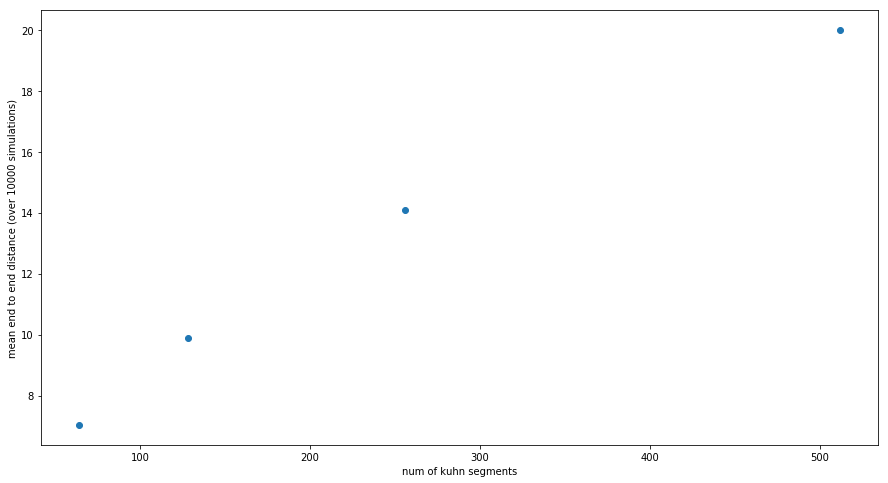

In [68]:
plt.figure(figsize=(15,8))
plt.plot(N_arr, N_results, 'o')
plt.xlabel('num of kuhn segments')
plt.ylabel('mean end to end distance (over 10000 simulations)')

### trying to fit theoretical curve

We know that theoretically it should be N^(3/4)

In [70]:
def fit_f(x, A):
    return A*(x**(3/4))

In [71]:
from scipy.optimize import curve_fit
params = curve_fit(fit_f, N_arr, N_results)

In [74]:
l_fit = [params[0]*(n**(3/4)) for n in N_arr]

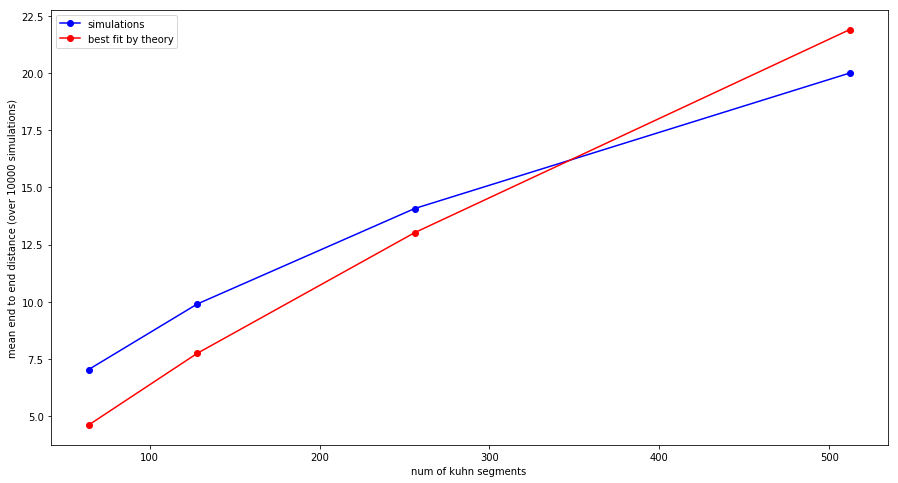

In [80]:
plt.figure(figsize=(15,8))
plt.plot(N_arr, N_results, 'bo-', label='simulations')
plt.plot(N_arr, l_fit, 'ro-', label='best fit by theory')
plt.xlabel('num of kuhn segments')
plt.ylabel('mean end to end distance (over 10000 simulations)')
plt.legend()